In [60]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dset

batch_size = 4
num_workers = 2

`torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False, sampler=None, batch_sampler=None, num_workers=0, collate_fn=<function default_collate>, pin_memory=False, drop_last=False, timeout=0, worker_init_fn=None)`


##`torchvision 의 DataLoader( 데이터셋, 배치 사이즈, 셔플 ) 로 데이터를 구성할 수 있다.`

In [136]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms.Compose([
                                            transforms.Resize(32,32),
                                            transforms.ToTensor(),
                                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

# DataLoader 을 처음 불러올 떄 Tensor 형태로 불러와야 한다

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=num_workers)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transforms.Compose([
                                            transforms.ToTensor(),
                                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=num_workers)

Files already downloaded and verified
Files already downloaded and verified


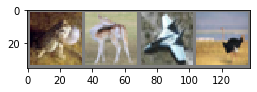

 frog  deer plane  bird


In [137]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize = (4,4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#`Network Class 만들기`

In [139]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3,6,5),
            nn.MaxPool2d(2,2),
            nn.ReLU(True)   
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(6,16,5),
            nn.MaxPool2d(2,2),
            nn.ReLU(True)
        )
        self.out = nn.Sequential(
            nn.Linear(16*5*5, 120),
            nn.ReLU(True),
            nn.Linear(120,84),
            nn.ReLU(True),
            nn.Linear(84,10)
        )
    def forward(self, inputs):
        x = self.conv2(self.conv1(inputs))
        x = x.view(x.size(0), -1)
        x = self.out(x)
        return x
net = Net()

In [142]:
net

Net(
  (conv1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace)
  )
  (conv2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace)
  )
  (out): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU(inplace)
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)

`Loss function 과 optimizer 를 정의하기`

###`Loss function = CrossEntropy`
###`Optimizer     = Adam`
###`Learning_rate = 0.002`

In [152]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.002)

In [153]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.174
[1,  4000] loss: 1.205
[1,  6000] loss: 1.235
[1,  8000] loss: 1.230
[1, 10000] loss: 1.255
[1, 12000] loss: 1.252
[2,  2000] loss: 1.191
[2,  4000] loss: 1.205
[2,  6000] loss: 1.221
[2,  8000] loss: 1.213
[2, 10000] loss: 1.239
[2, 12000] loss: 1.221
[3,  2000] loss: 1.179
[3,  4000] loss: 1.195
[3,  6000] loss: 1.215
[3,  8000] loss: 1.211
[3, 10000] loss: 1.225
[3, 12000] loss: 1.217
[4,  2000] loss: 1.171
[4,  4000] loss: 1.160
[4,  6000] loss: 1.176
[4,  8000] loss: 1.206
[4, 10000] loss: 1.192
[4, 12000] loss: 1.210
[5,  2000] loss: 1.139
[5,  4000] loss: 1.131
[5,  6000] loss: 1.159
[5,  8000] loss: 1.179
[5, 10000] loss: 1.172
[5, 12000] loss: 1.175
Finished Training


In [154]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %


In [151]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 60 %
Accuracy of   car : 66 %
Accuracy of  bird : 49 %
Accuracy of   cat : 37 %
Accuracy of  deer : 52 %
Accuracy of   dog : 48 %
Accuracy of  frog : 62 %
Accuracy of horse : 64 %
Accuracy of  ship : 81 %
Accuracy of truck : 59 %
